In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import shutil
from yolo_tools import mseg_attribute_update_gt, data_merge, data_check, mseg2seg, ref_split

from yolo_mask_crop import myolo_crop, myolo_crop_mp
from classify_tools import ref_split_class
from yolo_sta import yolo_sta
from select_defect_data import obj_record, select_by_predict
from yolo_result_analysis import model_pred_compare


In [5]:
defect_list = ['deformation', 'broken', 'abandonment', 'corrosion']
level_list = ['no', 'medium', 'high']


fuse_mseg_c6_dir = r'/localnvme/data/billboard/fused_data/data1422_mseg_c6'
fuse_seg_c6_dir = r'/localnvme/data/billboard/fused_data/data1422_seg_c6'

In [ ]:
dataset_dir = fuse_mseg_c6_dir
image_dir = os.path.join(dataset_dir, 'images')
labels_dir = os.path.join(dataset_dir, 'labels')
class_file = os.path.join(dataset_dir, 'class.txt')
attribute_file = os.path.join(dataset_dir, 'attribute.yaml')

image_crop_dir = os.path.join(dataset_dir, 'images_crop_box')
sta_dir=os.path.join(dataset_dir, "labels_sta")
obj2img_path=os.path.join(dataset_dir, "images_crop.json")
sta_att_path=os.path.join(sta_dir, "sta_attribute.csv")
box_path=os.path.join(sta_dir, "sta_box.csv")
info_path=os.path.join(sta_dir, "info.csv")

In [8]:
# myolo_crop(image_dir, labels_dir, image_crop_dir, class_file,
#            attribute_file=attribute_file, seg=True, annotation=True,
#            save_method='attribute',
#            crop_method='without_background_box_shape')

myolo_crop_mp(image_dir, labels_dir, image_crop_dir, class_file,
           attribute_file=attribute_file, seg=True, annotation=True,
           save_method='attribute',
           crop_method='without_background_box_shape')

100%|██████████| 15590/15590 [00:00<00:00, 259452.12it/s]


100%|██████████| 1422/1422 [00:11<00:00, 128.80it/s]


csv save to /localnvme/data/billboard/fused_data/data1422_mseg_c6/labels_sta/sta_attribute.csv
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
总box数: 15590
没有缺陷的box数: 13913
有缺陷的box数: 1677
总image数: 1421
没有缺陷的image数: 635
有缺陷的image数: 786
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
category        hanging display  hanging frame  other  projecting display  \
deformation                29.0           10.0    0.0                91.0   
broken                     77.0            2.0    0.0               260.0   
abandonment                10.0           24.0    0.0                40.0   
corrosion                  40.0          297.0    0.0               337.0   
attribute sum             156.0          333.0    0.0               728.0   
with attribute             96.0          182.0    0.0               478.0   

category        projecting frame  wall display  wall frame   total  
de

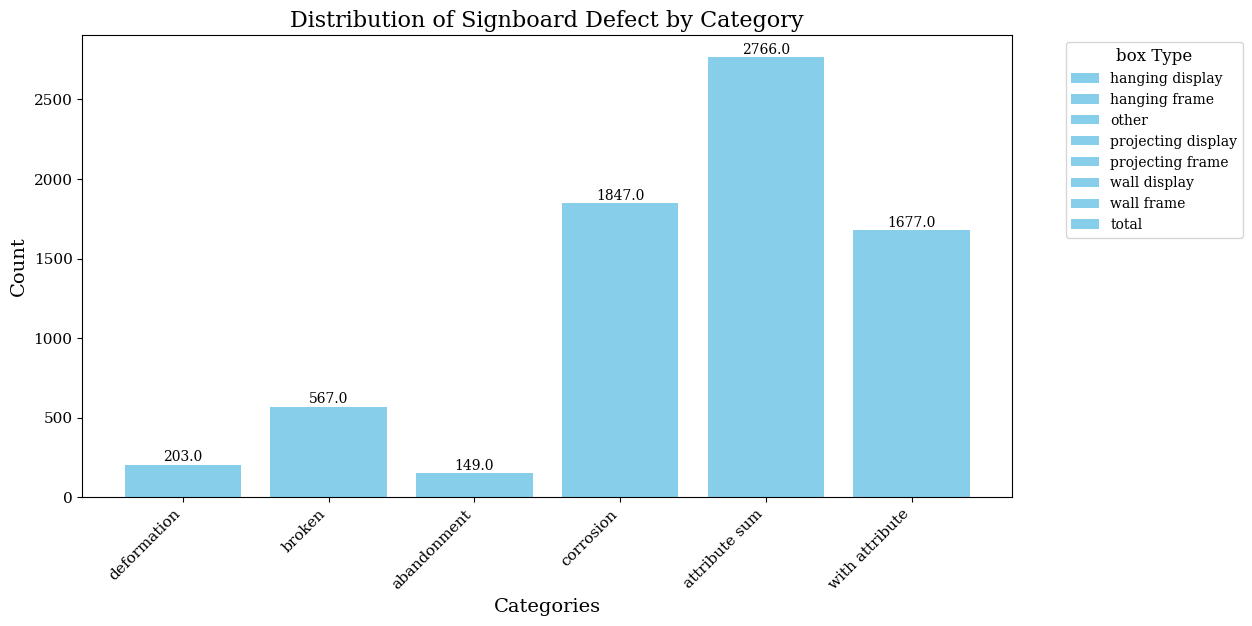

In [9]:
yolo_sta(
    img_dir=None,
    gt_dir=labels_dir,
    result_dir=sta_dir,
    class_path=class_file,
    attribute_path=attribute_file,
    seg=True,
)

In [12]:
obj_record(sta_att_path, box_path, obj2img_path, info_path)

merge /localnvme/data/billboard/fused_data/data1422_mseg_c6/labels_sta/sta_attribute.csv+/localnvme/data/billboard/fused_data/data1422_mseg_c6/labels_sta/sta_box.csv --> /localnvme/data/billboard/fused_data/data1422_mseg_c6/labels_sta/info.csv finished!
